# Numpy Arrays

Multi-dimensional arrays. Why do we need them?

For example, let's say I have a whole bunch of data points, like

    Person    The Matrix      Inception      Force Awakens     Wall-E ...
         A         5              4                5              ?
         B         4              ?                4              ?
         C         ?              ?                5              5
         ...
         
We would like to guess how Person C would rate Inception. Not an easy problem, but how would we store this kind of data in the first place?

If we wanted to just store the matrix, we can do a list of lists.

    xs = [[5, 4, 5, 3], [4, -1, 4, -1], [-1, -1, 5, 5]]
  
There are 3 lists (one per person) and each one has 4 entries. So it's a 3x4 matrix. We can do a lot with lists of lists, but it will be slow. We would eventually need a more efficient and flexible ways of using multi-dimensional arrays:

The standard way of working with data sets in Python is to use the **Numpy** library. A Numpy array is a multi-dimensional array. 

In [1]:
import numpy as np
arr = np.array([[5, 4, 5, 3], [4, -1, 4, -1], [-1, -1, 5, 5]])
print(arr)

[[ 5  4  5  3]
 [ 4 -1  4 -1]
 [-1 -1  5  5]]


In [2]:
type(arr)

numpy.ndarray

Every array has a shape:

In [3]:
arr.shape

(3, 4)

In [4]:
arr = np.array([[1,2,3], [4,5,6]])
print(arr)

[[1 2 3]
 [4 5 6]]


In [5]:
arr.shape

(2, 3)

In [6]:
# accessing elements:
arr[0]    # 0th row

array([1, 2, 3])

In [7]:
arr[1]     # 1st row

array([4, 5, 6])

In [8]:
arr[0, 0]    # very different from lists of lists, for those, we would have done arr[0][0]

1

In [9]:
arr[0, 1]

2

We can use slicing too:

In [10]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
arr[1:3,1:3]

array([[5, 6],
       [8, 9]])

In [12]:
arr[0,:]

array([1, 2, 3])

In [13]:
arr[:,0]

array([1, 4, 7])

We can have 3 or more dimensional arrays too

In [14]:
ar3 = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(ar3)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [15]:
ar3.shape

(2, 2, 3)

In [16]:
ar3[0,1,2]

6

### Building Arrays

In [17]:
arr = np.zeros([3,3])   # you put the shape in as a list

In [18]:
arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

The identity matrix

In [19]:
arr = np.identity(4)
arr

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Equally distant points:

In [20]:
np.linspace(1,2,11)   # 11 points between 0 and and 1 inclusive

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

Of course we could have done this with list comprehensions (`[1 + 0.1*x for x in range(11)]`) but anything you do in numpy will be faster. 

### Vectorization:

In [21]:
# guess what will happen?
arr = np.zeros([3,3])
arr = arr + 1
print(arr)

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


Similarly

In [22]:
def f(x):
    return x*x + x + 1

f(arr)    # again this would never work for lists

array([[ 3.,  3.,  3.],
       [ 3.,  3.,  3.],
       [ 3.,  3.,  3.]])

In [23]:
# Remark: for library functions you may need to use a function called `vectorize`

Even more interesting:

In [24]:
np.array([1,2,3]) + np.array([4,5,6])   # if these were lists, it would be concatenation

array([5, 7, 9])

It added the arrays as if they were vectors. Numpy figures out how to use the function with the array you gave. 

<br>

But maybe you want to control it youself:

In [25]:
arr = np.array(range(9)).reshape(3,3) + 1

In [26]:
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [27]:
np.sum(arr)

45

In [28]:
np.apply_along_axis(np.sum, 0, arr)

array([12, 15, 18])

In [29]:
np.apply_along_axis(np.sum, 1, arr)

array([ 6, 15, 24])

There is also: `np.apply_over_axis`

### Reshape

In [30]:
arr = np.array(range(16))

In [31]:
arr.reshape(4,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [32]:
arr.reshape(2,2,-1)    # if you put -1, it figures out what the shape should be

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [33]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [34]:
np.reshape(arr, (2,2,-1))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

# Plotting with Matplotlib

This is very very similar to Matlab's plotting functions. 

In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from math import pi
from math import cos

In [36]:
xs = np.linspace(0, 2*pi, 200)
ys = np.cos(xs)
zs = np.sin(xs)

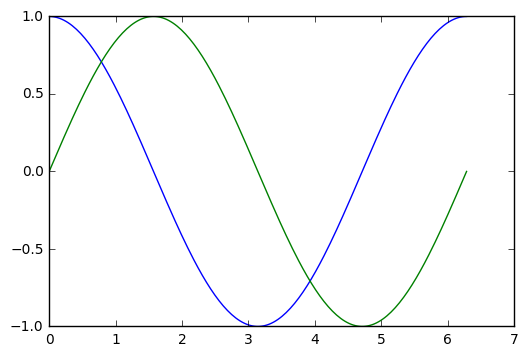

In [37]:
plt.plot(xs, ys)  # first one is blue
plt.plot(xs, zs)  # second one is green